<a href="https://colab.research.google.com/github/Thienbuu/practice_dl_project/blob/master/dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Dog vs Cat classification

In [1]:
!pip install fastai2 -qq

     |████████████████████████████████| 194kB 2.8MB/s 


In [14]:
# Upload kaggle.json file
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [15]:
!rm -rf ~/.kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [17]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition -p data

  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 102MB/s]
100% 542M/544M [00:10<00:00, 49.3MB/s]
100% 544M/544M [00:10<00:00, 55.5MB/s]
 93% 252M/271M [00:06<00:00, 56.1MB/s]
100% 271M/271M [00:06<00:00, 42.6MB/s]


In [18]:
!rm -rf data/train
!rm -rf data/test
!unzip -qq data/train.zip -d data
!unzip -qq data/test.zip -d data

In [19]:
from fastai2.vision.all import *

In [20]:
path = Path('data')

In [21]:
(path/'train').ls()

(#25000) [Path('data/train/cat.2339.jpg'),Path('data/train/dog.7485.jpg'),Path('data/train/cat.5665.jpg'),Path('data/train/cat.4844.jpg'),Path('data/train/dog.10479.jpg'),Path('data/train/dog.11975.jpg'),Path('data/train/cat.517.jpg'),Path('data/train/dog.6218.jpg'),Path('data/train/dog.6970.jpg'),Path('data/train/cat.5846.jpg')...]

In [22]:
def get_y(f):
  file_name = Path(f).stem.split('.')[0]
  return file_name

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=get_y,
                   item_tfms=Resize(128)
                   )

In [23]:
dsets = dblock.datasets(path/'train')

In [24]:
print('Train len: {0}. Valid len: {1}.'.format(len(dsets.train), len(dsets.valid)))

Train len: 20000. Valid len: 5000.


In [25]:
dls = dblock.dataloaders(path/'train')

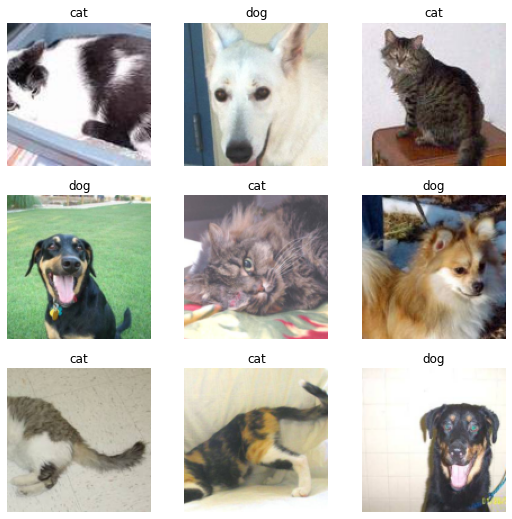

In [26]:
dls.show_batch(nrows=3, ncols=3)

In [30]:
learn = cnn_learner(dls, resnet50, pretrained=True,
                    loss_func=F.cross_entropy,
                    metrics=accuracy
                    )

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0002290867705596611)

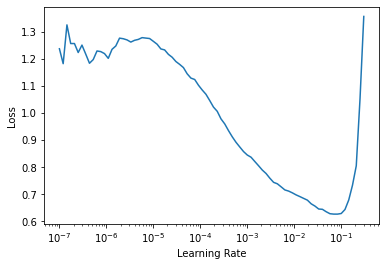

In [28]:
learn.lr_find()

In [ ]:
learn.fine_tune(30, base_lr=1e-3, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,0.146914,0.095974,0.960800,01:32
1,0.141406,0.088161,0.964400,01:32
2,0.102349,0.073934,0.969400,01:32


epoch,train_loss,valid_loss,accuracy,time
0,0.057238,0.047272,0.982600,01:37
1,0.040979,0.045849,0.983600,01:37
2,0.027928,0.052954,0.982800,01:37
3,0.020905,0.049573,0.983400,01:37
4,0.027034,0.066046,0.981400,01:37
5,0.020784,0.045319,0.985200,01:37
6,0.018568,0.051015,0.984000,01:37
7,0.019250,0.045488,0.984000,01:37
8,0.020869,0.056578,0.982600,01:38
9,0.018192,0.051604,0.984400,01:39
